In [8]:
import cv2
import numpy as np

In [5]:
detector = cv2.CascadeClassifier('xml/haarcascade_frontalface_default.xml')
recog = cv2.face.LBPHFaceRecognizer_create()
faces = []
ids = []

In [5]:
import cv2
import os
import numpy as np

# 加载人脸识别器

recognizer = cv2.face.LBPHFaceRecognizer_create()

cascade_path = "xml/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

# 输入和输出目录
input_dir = "data/hsx"
output_dir = "data/hsx_cropped"

# 如果输出目录不存在，则创建
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 循环处理每张图像
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg"):
        # 读取图像
        image = cv2.imread(os.path.join(input_dir, filename))
        # 转换为灰度图像
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # 检测人脸
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(60, 60))
        
        # 循环处理每个检测到的人脸
        for (x, y, w, h) in faces:
            # 裁剪人脸
            face = image[y:y+h, x:x+w]
            
            # 保存裁剪后的人脸图像
            cv2.imwrite(os.path.join(output_dir, filename.split('.')[0] + "_cropped.jpg"), face)
            
            # 人脸对齐
            # 这里可以加入更多的人脸对齐方法
            
            # 水平翻转
            flipped_face = cv2.flip(face, 1)
            cv2.imwrite(os.path.join(output_dir, filename.split('.')[0] + "_flipped.jpg"), flipped_face)

            # 垂直翻转
            flipped_face_v = cv2.flip(face, 0)
            cv2.imwrite(os.path.join(output_dir, filename.split('.')[0] + "_flipped_v.jpg"), flipped_face_v)

            # 旋转
            rows, cols, _ = face.shape
            M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
            rotated_face = cv2.warpAffine(face, M, (cols, rows))
            cv2.imwrite(os.path.join(output_dir, filename.split('.')[0] + "_rotated.jpg"), rotated_face)


In [6]:
import os
import cv2
import numpy as np
faces = []
ids = []

for filename in os.listdir('data/hsx_cropped'):
    if filename.endswith('.jpg'):
        img = cv2.imread(f'data/hsx_cropped/{filename}')    
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        img_np = np.array(gray,'uint8')               
        face = detector.detectMultiScale(gray)        
        for(x,y,w,h) in face:
            faces.append(img_np[y:y+h,x:x+w])        
            ids.append(1) 
for filename in os.listdir('data/hjy_cropped'):
    if filename.endswith('.jpg'):
        img = cv2.imread(f'data/hjy_cropped/{filename}')
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_np = np.array(gray, 'uint8')
        face = detector.detectMultiScale(gray)
        for (x,y,w,h) in face:
            faces.append(img_np[y:y+h, x:x+w])
            ids.append(2)

for filename in os.listdir('data/jzq_cropped'):
    if filename.endswith('.jpg'):
        img = cv2.imread(f'data/jzq_cropped/{filename}')
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_np = np.array(gray, 'uint8')
        face = detector.detectMultiScale(gray)
        for (x,y,w,h) in face:
            faces.append(img_np[y:y+h, x:x+w])
            ids.append(3)



print('training...')
recog.train(faces, np.array(ids))
recog.save('face3.yml')
print('done')

training...
done


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the face detector and recognizer
detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
recog = cv2.face.LBPHFaceRecognizer_create()

# Initialize lists for faces and labels
faces = []
ids = []

# Function to read images, detect faces, and append to lists
def read_images_and_labels(directory, label):
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img = cv2.imread(os.path.join(directory, filename))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces_detected = detector.detectMultiScale(gray)
            for (x, y, w, h) in faces_detected:
                faces.append(gray[y:y+h, x:x+w])
                ids.append(label)

# Read images and labels for each person
read_images_and_labels('data/hsx_cropped', 1)
read_images_and_labels('data/hjy_cropped', 2)
read_images_and_labels('data/jzq_cropped', 3)

# Split the data into training and testing sets
faces_train, faces_test, ids_train, ids_test = train_test_split(faces, ids, test_size=0.2, random_state=42)

# Train the recognizer on the training set
print('Training...')
recog.train(faces_train, np.array(ids_train))
recog.save('face4.yml')
print('Done')

# Test the recognizer on the test set
predictions = []
for face in faces_test:
    label, confidence = recog.predict(face)
    predictions.append(label)

# Calculate and print the accuracy
accuracy = accuracy_score(ids_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


ImportError: cannot import name 'int' from 'numpy' (c:\Users\amy06\anaconda3\lib\site-packages\numpy\__init__.py)

In [4]:
import numpy as np
import cv2

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('face.yml')
cascade_path = "xml/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print('cam is not opened')
    exit(0)
name = {
        '1': 'hsx',
        '2': 'hjy'
    }
while True:
    ret,img = cap.read()
    img = cv2.resize(img, (640, 480))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
        id, conf = recognizer.predict(gray[y:y+h, x:x+w])
        if conf < 60:
            cv2.putText(img, name[str(id)], (x+5, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        else:
            cv2.putText(img, 'unknown', (x+5, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('face', img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
img = cv2.imread('data/4.jpg', cv2.IMREAD_COLOR)
gary = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faceCascade =  cv2.CascadeClassifier('xml/haarcascade_frontalface_default.xml')
recog = cv2.face.LBPHFaceRecognizer_create()
img_np = np.array(gary, 'uint8')
face = faceCascade.detectMultiScale(gary, scaleFactor=1.1, minNeighbors=3)

#faces = faceCascade.detectMultiScale(gary, scaleFactor=1.1, minNeighbors=3)

cnt = 0
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cnt += 1

cv2.putText(img, 'face: ' + str(cnt), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow('face', img)

if cnt>1:
    print('more than 1 face')
else:
    print('only 1 face')

if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

more than 1 face


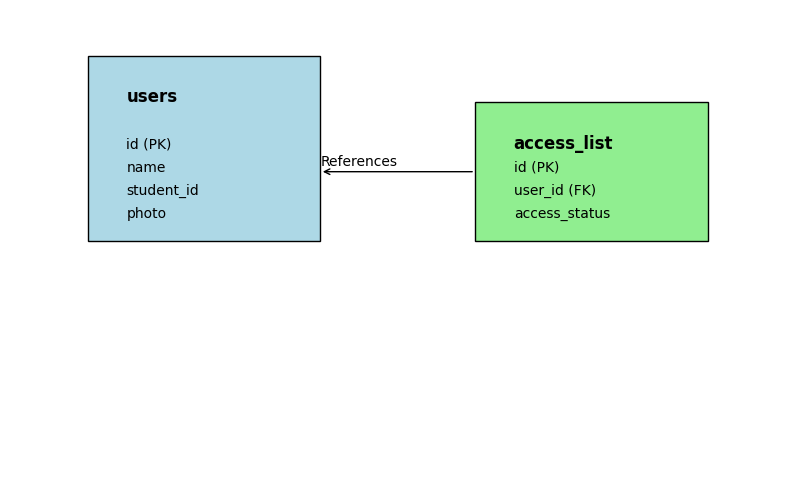

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制用户信息表
ax.add_patch(patches.Rectangle((0.1, 0.5), 0.3, 0.4, fill=True, edgecolor='black', facecolor='lightblue'))
ax.text(0.15, 0.8, 'users', fontsize=12, fontweight='bold')
ax.text(0.15, 0.7, 'id (PK)', fontsize=10)
ax.text(0.15, 0.65, 'name', fontsize=10)
ax.text(0.15, 0.6, 'student_id', fontsize=10)
ax.text(0.15, 0.55, 'photo', fontsize=10)

# 绘制通行名单表
ax.add_patch(patches.Rectangle((0.6, 0.5), 0.3, 0.3, fill=True, edgecolor='black', facecolor='lightgreen'))
ax.text(0.65, 0.7, 'access_list', fontsize=12, fontweight='bold')
ax.text(0.65, 0.65, 'id (PK)', fontsize=10)
ax.text(0.65, 0.6, 'user_id (FK)', fontsize=10)
ax.text(0.65, 0.55, 'access_status', fontsize=10)

# 绘制箭头
ax.annotate('', xy=(0.4, 0.65), xytext=(0.6, 0.65), arrowprops=dict(arrowstyle='->'))

# 添加箭头的注释
ax.text(0.45, 0.67, 'References', fontsize=10, va='center', ha='center')

# 设置图形的范围和标签
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# 显示图形
plt.show()


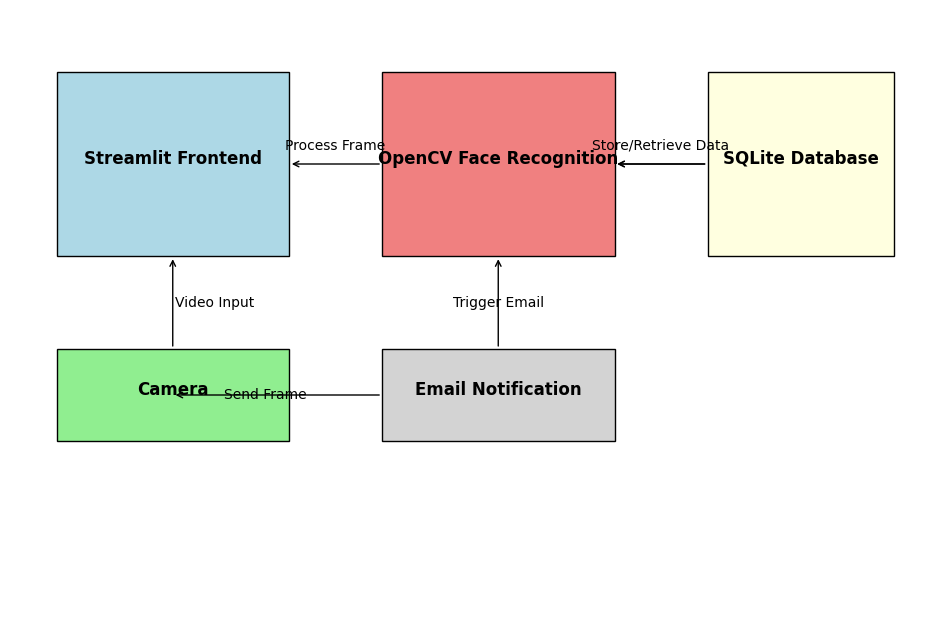

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 创建图形和轴
fig, ax = plt.subplots(figsize=(12, 8))

# 绘制Streamlit前端
ax.add_patch(patches.Rectangle((0.05, 0.6), 0.25, 0.3, fill=True, edgecolor='black', facecolor='lightblue'))
ax.text(0.175, 0.75, 'Streamlit Frontend', fontsize=12, fontweight='bold', ha='center')

# 绘制摄像头
ax.add_patch(patches.Rectangle((0.05, 0.3), 0.25, 0.15, fill=True, edgecolor='black', facecolor='lightgreen'))
ax.text(0.175, 0.375, 'Camera', fontsize=12, fontweight='bold', ha='center')

# 绘制OpenCV人脸识别
ax.add_patch(patches.Rectangle((0.4, 0.6), 0.25, 0.3, fill=True, edgecolor='black', facecolor='lightcoral'))
ax.text(0.525, 0.75, 'OpenCV Face Recognition', fontsize=12, fontweight='bold', ha='center')

# 绘制SQLite数据库
ax.add_patch(patches.Rectangle((0.75, 0.6), 0.2, 0.3, fill=True, edgecolor='black', facecolor='lightyellow'))
ax.text(0.85, 0.75, 'SQLite Database', fontsize=12, fontweight='bold', ha='center')

# 绘制邮件通知系统
ax.add_patch(patches.Rectangle((0.4, 0.3), 0.25, 0.15, fill=True, edgecolor='black', facecolor='lightgrey'))
ax.text(0.525, 0.375, 'Email Notification', fontsize=12, fontweight='bold', ha='center')

# 绘制箭头和连接
ax.annotate('', xy=(0.175, 0.6), xytext=(0.175, 0.45), arrowprops=dict(arrowstyle='->'))  # 摄像头到前端
ax.annotate('', xy=(0.3, 0.75), xytext=(0.4, 0.75), arrowprops=dict(arrowstyle='->'))  # 前端到OpenCV
ax.annotate('', xy=(0.65, 0.75), xytext=(0.75, 0.75), arrowprops=dict(arrowstyle='->'))  # OpenCV到数据库
ax.annotate('', xy=(0.75, 0.75), xytext=(0.65, 0.75), arrowprops=dict(arrowstyle='<-'))  # 数据库到OpenCV
ax.annotate('', xy=(0.525, 0.6), xytext=(0.525, 0.45), arrowprops=dict(arrowstyle='->'))  # OpenCV到邮件通知
ax.annotate('', xy=(0.175, 0.375), xytext=(0.4, 0.375), arrowprops=dict(arrowstyle='->'))  # 摄像头到邮件通知

# 添加文字描述箭头的含义
ax.text(0.22, 0.525, 'Video Input', fontsize=10, va='center', ha='center')
ax.text(0.35, 0.78, 'Process Frame', fontsize=10, va='center', ha='center')
ax.text(0.7, 0.78, 'Store/Retrieve Data', fontsize=10, va='center', ha='center')
ax.text(0.525, 0.525, 'Trigger Email', fontsize=10, va='center', ha='center')
ax.text(0.275, 0.375, 'Send Frame', fontsize=10, va='center', ha='center')

# 设置图形的范围和标签
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# 显示图形
plt.show()
